In [1]:
%load_ext autoreload
%autoreload 2

## Initialisation

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from LogGabor import LogGabor
import torch
from torchvision import datasets, transforms
import os
import noise
import MotionClouds as mc

In [3]:
from Where import *

Loading accuracy... min, max= 0.0145 0.9852


In [10]:
def randomized_perlin_noise(shape=(128,128), scale=10, octaves=6, persistence=0.5, lacunarity=2.0, base=0):
    import noise
    noise_vector = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            noise_vector[i][j] = noise.pnoise2(i/scale,
                                        j/scale,
                                        octaves=int(octaves * abs(np.random.randn()))+1,
                                        persistence=persistence * abs(np.random.randn()),
                                        lacunarity=lacunarity * abs(np.random.randn()),
                                        repeatx=shape[0], 
                                        repeaty=shape[1], 
                                        base=base)           

    return noise_vector



In [4]:
i_offset, j_offset = 15, 15

### MNIST_28

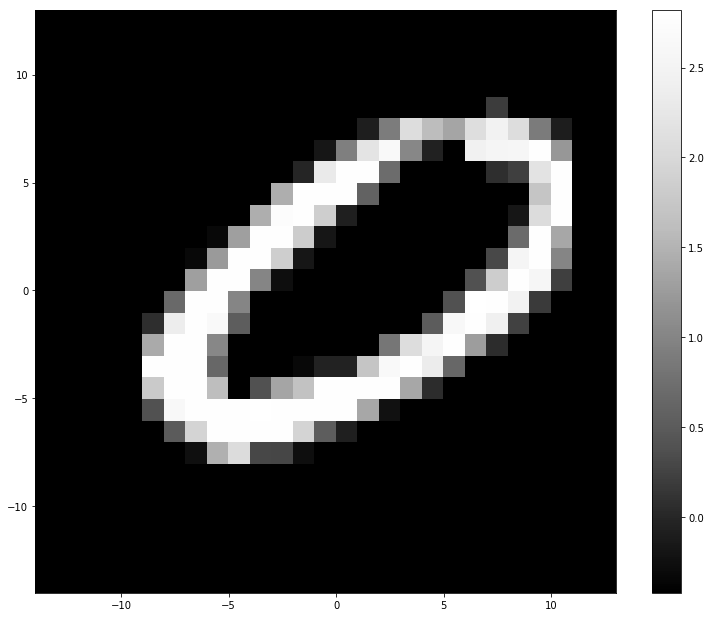

In [5]:
path = 'MNIST_28.pdf'
N_pic = 28
for batch_idx, (data, target) in enumerate(data_loader):
    data_28 = data[-1][-1]
    fig, ax = plt.subplots(figsize=(13, 10.725))
    cmap = ax.pcolor(np.arange(-N_pic/2, N_pic/2), np.arange(-N_pic/2, N_pic/2), np.flipud(data_28), cmap='Greys_r')
    fig.colorbar(cmap)
    #plt.savefig(path)
    break

### MNIST_128

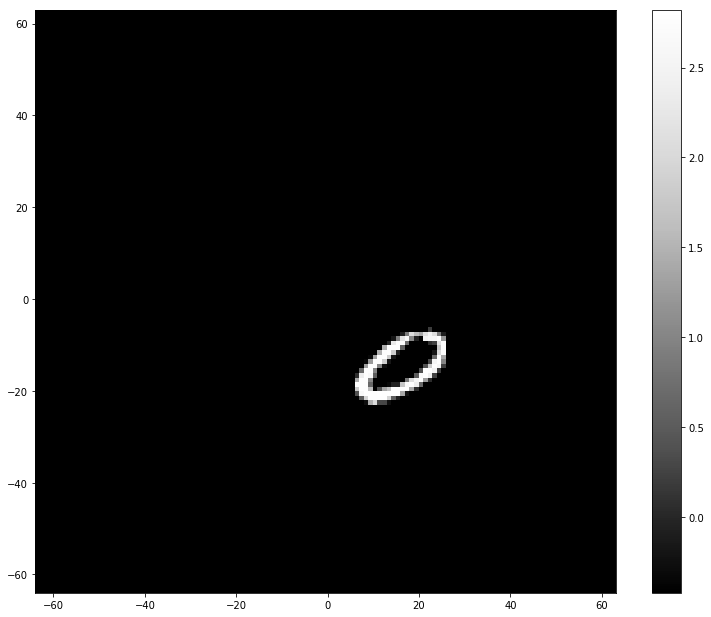

In [6]:
for batch_idx, (data,target) in enumerate(data_loader):
    mnist_fullfield(data_28, i_offset, j_offset, figure_type='128')
    break

### Bruit perlin

TypeError: Dimensions of C (128, 128) are incompatible with X (28) and/or Y (28); see help(pcolor)

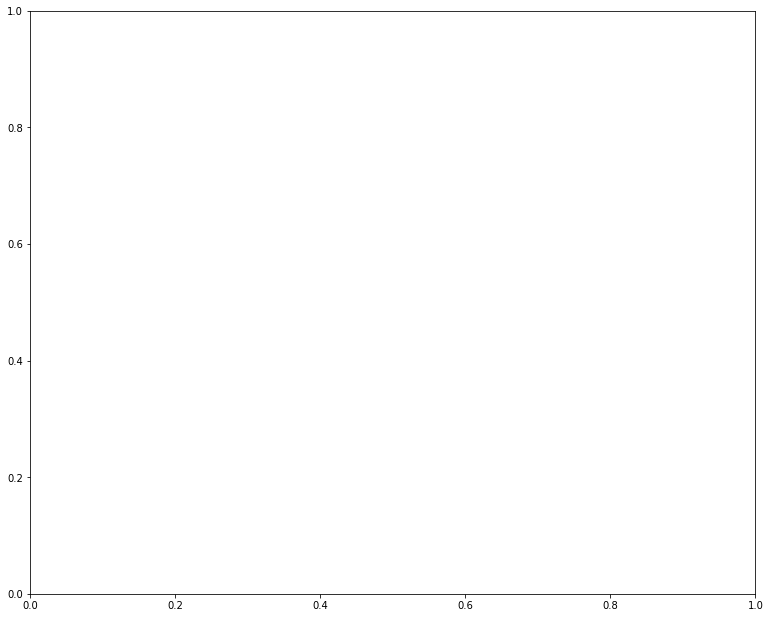

In [11]:
fig, ax = plt.subplots(figsize=(13, 10.725))
cmap = ax.pcolor(np.arange(-N_pic/2, N_pic/2), np.arange(-N_pic/2, N_pic/2), randomized_perlin_noise())
fig.colorbar(cmap)

### Bruit MotionCloud

(<Figure size 936x772.2 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x108862978>)

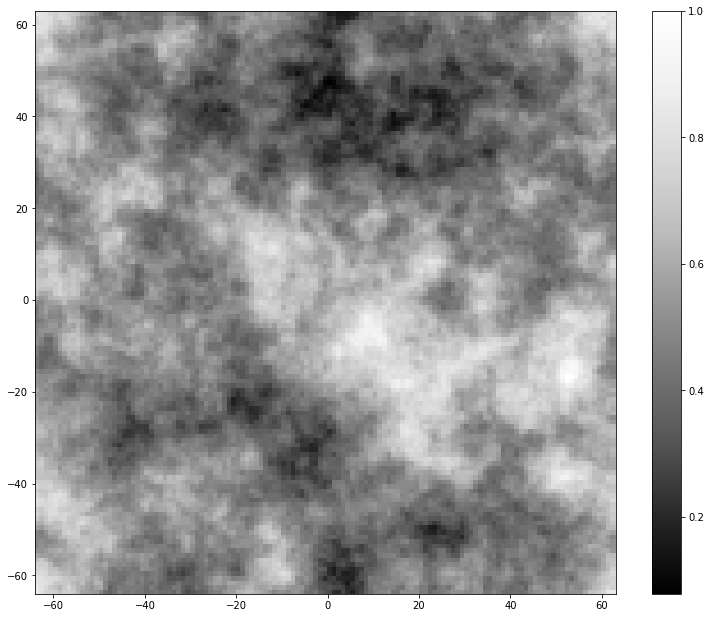

In [12]:
MotionCloudNoise(figure_type='cmap')

### Filtre LogPol classique

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10890ce10>)

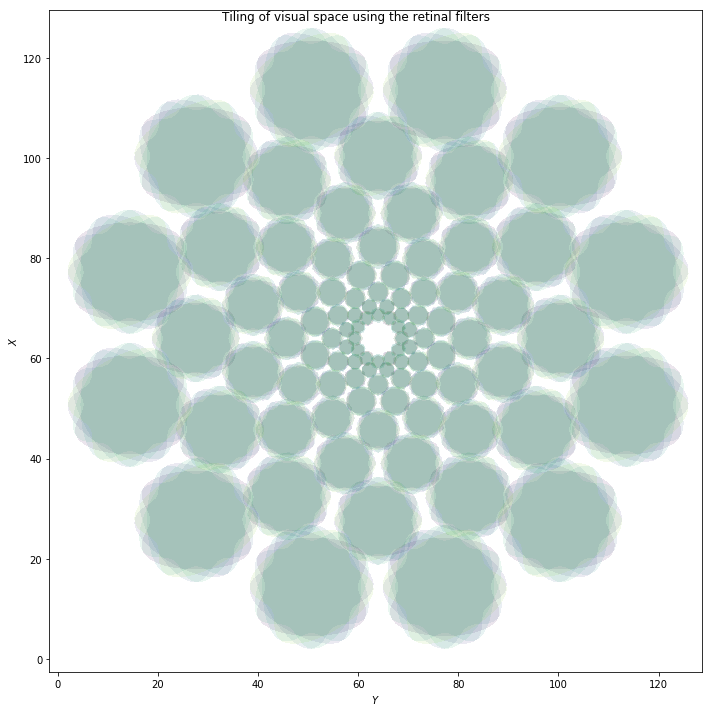

In [14]:
vectorization(figure_type='retina')

### Filtre LogPol classique + image

(<Figure size 936x772.2 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10ab905c0>)

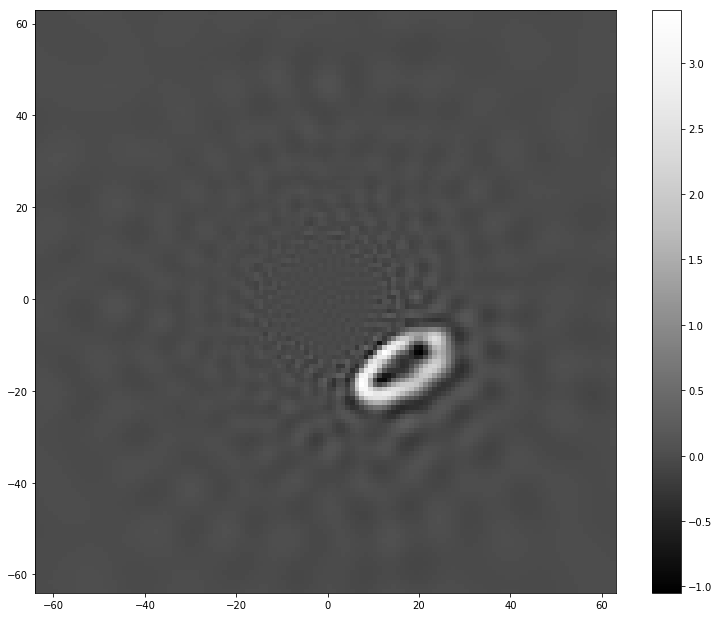

In [15]:
mnist_fullfield(data_28, i_offset, j_offset, figure_type='cmap')

### Filtre LogPol classique + image + bruit perlin

In [16]:
mnist_128(i_offset,j_offset, noise=True, noise_type='Perlin')

NameError: name 'mnist_128' is not defined

### Filtre LogPol classique + image + bruit MotionCloud

In [17]:
mnist_128(i_offset,j_offset, noise=True, noise_type='MotionCloud')
plt.savefig('mnist_128_LP_MotionCloud.pdf')

NameError: name 'mnist_128' is not defined

### Filtre LogPolaire + image + MotionCloud (méthode alternative de déplacement de MNIST au sein de l'image)

In [ ]:
mnist_128_meth2(i_offset, j_offset)

### Filtre LogPol + orientations moyennées

In [ ]:
energy = (phi**2).sum(axis=(0,3)) 
energy /= energy.sum(axis=-1)[:, :, None]
energy_vector = energy.reshape((N_orient*N_scale, N_X*N_Y))
energy_plus = np.linalg.pinv(energy_vector)

fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_WIDTH))
for i_orient in range(N_orient):
    for i_scale in range(N_scale):
        env = np.sqrt(energy[i_orient, i_scale, :]**2.5).reshape((N_X, N_Y))
        ax.contour(energy[i_orient, i_scale, :].reshape((N_X, N_Y)), levels=[env.max()/2], lw=1, colors=[plt.cm.viridis(i_theta/(N_theta))])
fig.suptitle('Tiling of visual space using energy')
ax.set_xlabel(r'$Y$')
ax.set_ylabel(r'$X$')
ax.axis('equal')
plt.tight_layout()
plt.savefig('logpol_energy_filter.pdf')

### Filtre LogPol + orientations moyennées + accuracy

In [ ]:
path = "MNIST_accuracy.npy"
if os.path.isfile(path):
    accuracy =  np.load(path)

accuracy_128(i_offset,j_offset)
plt.savefig('accuracy_128_LP.pdf')

### LogPolar view

In [ ]:
mnist_128(i_offset,j_offset, noise=False, figure_type='log')
plt.savefig('mnist_log_nonoise.pdf')

### LogPolar view + noise

In [ ]:
mnist_128(i_offset, j_offset, figure_type='log')
plt.savefig('mnist_log_motioncloud.pdf')